### 2 . Random Sample Imputation

Random sample imputation consists of taking random observation from the data set and use this observation to replace the nan values

It assumes the data are missing completely at Random (MCAR)

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('titanic.csv', usecols = ['Age', 'Fare', 'Survived'])

In [3]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [5]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [19]:

#df['Age'].dropna().sample(df['Age'].isnull().sum(), random_state=1)
df['Age'].dropna().sample(df['Age'].isnull().sum(), random_state=1)

689    15.0
278     7.0
506    33.0
9      14.0
494    21.0
       ... 
66     29.0
40     40.0
322    30.0
597    49.0
436    21.0
Name: Age, Length: 177, dtype: float64

In [20]:
def impute_nan(data, variable, median):
    df[variable+'_median'] = df[variable].fillna(median)
    df[variable+'_random'] = df[variable]
    # random sample to fill the nan values
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state=1)
    ## pandas need to have the same index in order to merge the dataset
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+'_random'] = random_sample

In [21]:
median = df.Age.median()

In [22]:
median

28.0

In [23]:
impute_nan(df,'Age',median)

In [24]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


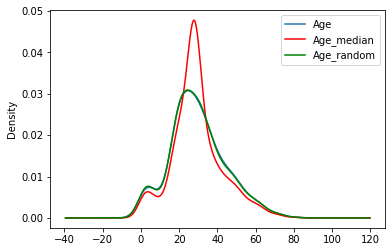

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
df.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### Advantages
Easy To implement
There is less distortion in variance


### Disadvantage
Every situation randomness wont work

####  3. Capturing NaN values with a new feature

It works well if the data are not missing at random

In [31]:
df

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
...,...,...,...,...,...
886,0,27.0,13.0000,27.0,27.0
887,1,19.0,30.0000,19.0,19.0
888,0,NaN,23.4500,28.0,21.0
889,1,26.0,30.0000,26.0,26.0


In [32]:
df = pd.read_csv('titanic.csv', usecols = ['Age', 'Fare', 'Survived'])

In [33]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [34]:
df['Age_NaN'] = np.where(df['Age'].isnull(),1,0)

In [35]:
df.head()

,Survived,Age,Fare,Age_NaN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [36]:
df.Age.median()

28.0

In [38]:
df['Age'].fillna(df.Age.median(), inplace=True)

In [39]:
df.head(20)

,Survived,Age,Fare,Age_NaN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


#### Advantages
Easy to implement
Captures the importance of missing values
#### Disadvantages
Creating Additional Features(Curse of Dimensionality)

#### 4. End of distribution impuation

In [40]:
df = pd.read_csv('titanic.csv', usecols = ['Age', 'Fare', 'Survived'])

In [41]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


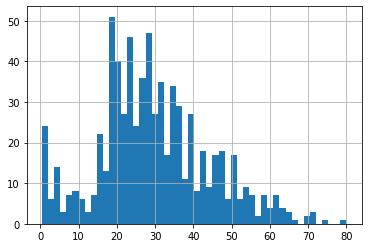

In [42]:
df.Age.hist(bins=50)

In [46]:
extreme = df.Age.mean()+3*df.Age.std()

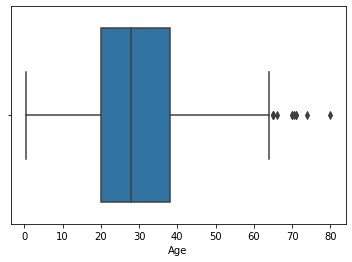

In [47]:
import seaborn as sns
sns.boxplot('Age', data = df)

In [48]:
def impute_nan(df,variable,median,extreme):
    df[variable + "_end_distribution"] = df[variable].fillna(extreme)
    df[variable].fillna(median,inplace = True)

In [49]:
df.Age.median()

28.0

In [50]:
impute_nan(df,'Age', df.Age.median(), extreme)

In [51]:
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


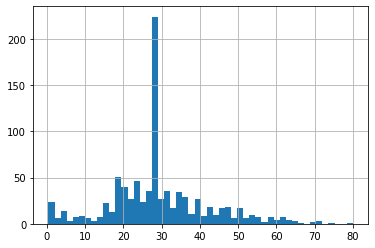

In [53]:
df['Age'].hist(bins=50)

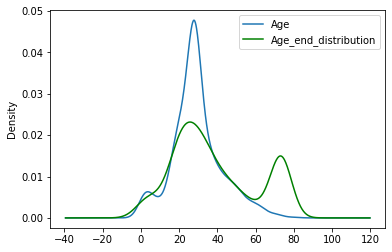

In [52]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
#df.Age_median.plot(kind='kde', ax=ax, color='red')
df.Age_end_distribution.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

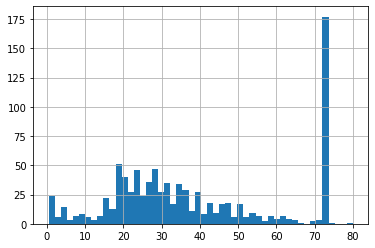

In [55]:
df['Age_end_distribution'].hist(bins=50)

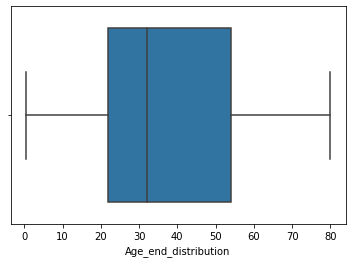

In [56]:
sns.boxplot('Age_end_distribution', data = df)